## Analysis Commands

Do you find yourself doing the same sequence of commands repeatedly in `ds9` ? 

You can script your interactions with ds9 and invoke them using the _Analysis_ menu.



### Data

This demo uses data for _SDSSJ1030+0524_, combined from multiple observations

```bash
find_chandra_obsid SDSSJ1030+0524 download=all
reproject_obs "*/primary/*evt2.fits.gz" outroot=SDSSJ1030+0524 
```

In [1]:
cd Analysis

ds9 SDSSJ1030+0524_merged_evt.fits -scale log -bin factor 2 &

[1] 16527


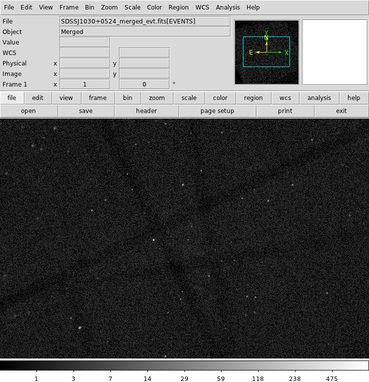

In [2]:
import -window "SAOImage ds9" -resize 50% ds9_11_analysis_01.png 
display < ds9_11_analysis_01.png

### Analysis Commands

The [Reference Manual](http://ds9.si.edu/doc/ref/analysis.html) contains a chapter on the _Analysis_ command.  Below is a very simple example:

In [3]:
cat kjg.ans

#
# Custom Commands
#
Maximize Image
*
bind m
simple.sh $xpa


Each command is a block of 4 lines in the analysis command file.  The hash lines are comments.  

1. The `Maximize Image` is the name of the command I created.  

2. The `*` is a filter for which file-types, in this case all file types.  

3. `bind m` says that this command will be executed whenever I press the lowercase `m` key.

4. The last line says run the `simple.sh` executable with one argument `$xpa`.  `$xpa` is a variable containing the title of the `ds9` GUI, ie just `ds9`.

Now what does `simple.sh` look like?

In [4]:
/bin/ls -l simple.sh | sed -e s,$USER,user, -e s,$GROUP,group, 

-rwxrwxr-x 1 user group 183 Dec 20 10:42 simple.sh


In [5]:
cat simple.sh

#!/bin/bash

xpa=$1

xpaset -p $xpa view colorbar no
xpaset -p $xpa view info no
xpaset -p $xpa view panner no
xpaset -p $xpa view magnifier no
xpaset -p $xpa view buttons no
exit 0



So we see that the script has execute permissions.  It is a `bash` shell script, that simply
run a set of `xpa` commands to hide various parts of the UI: `colorbar`, `info`, `panner`, `magnifier`, and `buttons`.

In [6]:
xpaset -p ds9 analysis load kjg.ans

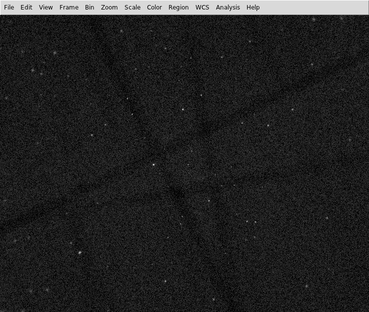

In [7]:
# Press 'm'
sleep 5

import -window "SAOImage ds9" -resize 50% ds9_11_analysis_02.png 
display < ds9_11_analysis_02.png

In [8]:
xpaset -p ds9 quit

: 1